In [1]:
import pandas as pnds
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.impute import SimpleImputer

from sklearn.model_selection import KFold

import itertools
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix

import seaborn as sns

from warnings import simplefilter
simplefilter (action = 'ignore', category = FutureWarning)
%matplotlib inline

In [2]:
# add the rows names
row_heading = ['age','sex','chest_pain','blood pressure','serum_cholestoral','fasting_blood_sugar',\
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal','diagnosis']

# read csv file with heart diseases data and storing it in dataframe
raw_heart = pnds.read_csv('./processed.cleveland.data', names=row_heading) 
raw_heart1 = pnds.read_csv('./processed.hungarian.data', names=row_heading)
raw_heart2 = pnds.read_csv('./processed.switzerland.data', names=row_heading)
# merging all datasets into one
raw_heart = raw_heart.append(raw_heart1)
raw_heart = raw_heart.append(raw_heart2)

In [3]:
# replacing missing values with NaN
heart = raw_heart.replace('?', np.nan);
# Replacing NaN values with mean value of their respective columns
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
heart_done = imp.fit_transform(heart).tolist()

In [4]:
#converting list to dataframe
heart_done = pnds.DataFrame(heart_done,columns=row_heading)
#removing outliers for age
index = heart_done[(heart_done['age'] >= 120)|(heart_done['age'] <= 0)].index
heart_done.drop(index, inplace=True)
heart_done['age'].describe()
print("********************Completed with pre-processing*****************************")


********************Completed with pre-processing*****************************


In [5]:
print("********************Start of Feature Engineering*****************************")
preprocessing.Normalizer(heart_done)
heart = heart_done
heart[:1000]

********************Start of Feature Engineering*****************************


,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.000000,233.0,1.00000,2.0,150.00000,0.000000,2.300000,3.000000,0.000000,6.000,0.0
1,67.0,1.0,4.0,160.000000,286.0,0.00000,2.0,108.00000,1.000000,1.500000,2.000000,3.000000,3.000,2.0
2,67.0,1.0,4.0,120.000000,229.0,0.00000,2.0,129.00000,1.000000,2.600000,2.000000,2.000000,7.000,1.0
3,37.0,1.0,3.0,130.000000,250.0,0.00000,0.0,187.00000,0.000000,3.500000,3.000000,0.000000,3.000,0.0
4,41.0,0.0,2.0,130.000000,204.0,0.00000,2.0,172.00000,0.000000,1.400000,1.000000,0.000000,3.000,0.0
5,56.0,1.0,2.0,120.000000,236.0,0.00000,0.0,178.00000,0.000000,0.800000,1.000000,0.000000,3.000,0.0
6,62.0,0.0,4.0,140.000000,268.0,0.00000,2.0,160.00000,0.000000,3.600000,3.000000,2.000000,3.000,3.0
7,57.0,0.0,4.0,120.000000,354.0,0.00000,0.0,163.00000,1.000000,0.600000,1.000000,0.000000,3.000,0.0
8,63.0,1.0,4.0,130.000000,254.0,0.00000,2.0,147.00000,0.000000,1.400000,2.000000,1.000000,7.000,2.0
9,53.0,1.0,4.0,140.000000,203.0,1.00000,2.0,155.00000,1.000000,3.100000,3.000000,0.000000,7.000,1.0


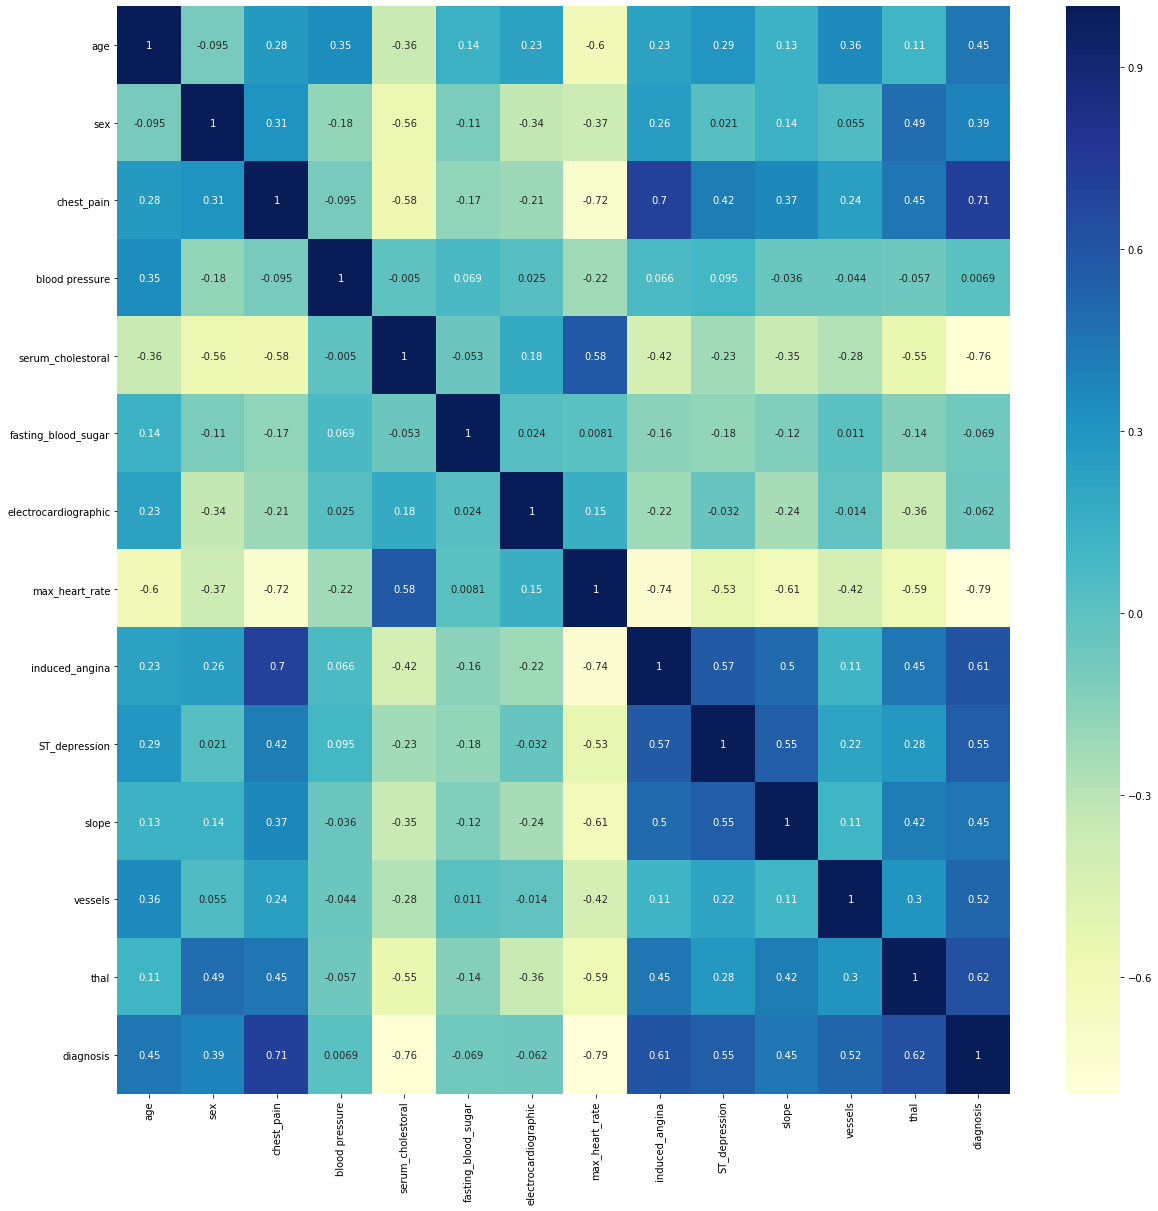

In [6]:
# heatmap plot
import seaborn as sns
import matplotlib.pyplot as plt
Var_Corr = heart.corr()
top_corr_features = Var_Corr.index
plt.figure(figsize=(20,20))
sns.heatmap(Var_Corr[top_corr_features].corr(), annot=True, cmap = "YlGnBu")


In [7]:
heart.loc[heart['diagnosis'] >=1, 'diagnosis'] = 1

In [8]:
print("From the above heatmap, it can be determined that no columns are co-related so we will be using all the columns for analysis.")

print("*********************************END OF FEATURE ENGINEERING ****************************************")

From the above heatmap, it can be determined that no columns are co-related so we will be using all the columns for analysis.
*********************************END OF FEATURE ENGINEERING ****************************************


*********************************Start of Data modelling ****************************************


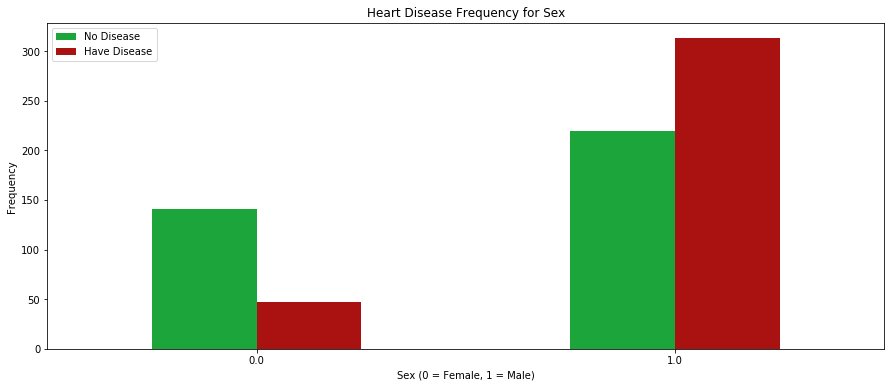

In [9]:
print("*********************************Start of Data modelling ****************************************")
# categorising all types of heart disease to genral heart disease
pnds.crosstab(heart.sex,heart.diagnosis).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [10]:
# separating result from rest of the data set
y = heart.diagnosis.values
x_data = heart.drop(['diagnosis'], axis = 1)

In [11]:

X_train, X_test, Y_train, Y_test = train_test_split(x_data,y,test_size = 0.2,random_state=3)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0


for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)


score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+"%")
Y_pred_rf.shape



The accuracy score achieved using Decision Tree is: 90.97%


(144,)

[0.08799102 0.02691936 0.16685491 0.06796566 0.11867386 0.01806147
 0.01820609 0.10393632 0.08626925 0.06657598 0.07764995 0.06293283
 0.09796329]


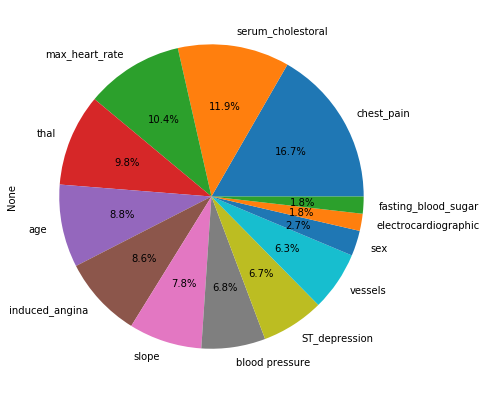

In [13]:
print(rf.feature_importances_)
feat_importances = pnds.Series(rf.feature_importances_, index=x_data.columns)
feat_importances.nlargest(14).plot(kind='pie', figsize=(8, 7), autopct='%1.1f%%', subplots=True)
plt.show()

In [14]:
#from sklearn.model_selection import cross_val_score
#print (np.mean(cross_val_score(rf, X_train, Y_train, cv=10)))

In [15]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion matrix, without normalization
[[73  5]
 [ 8 58]]


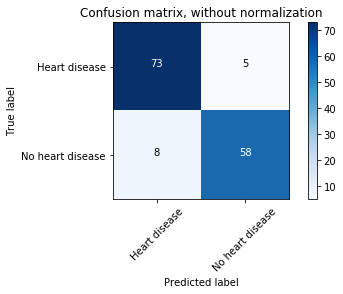

In [16]:

cnf_matrix = confusion_matrix(Y_test, Y_pred_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Heart disease", "No heart disease"],
                      title='Confusion matrix, without normalization')
plt.show()